In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

# df.info()

In [2]:
df_copy = df.copy()
df_copy = df.drop(['Video Title','Video Link','Channel URL','Date of Video Upload','Date of the Last Comment',
                   'No of Playlist','Subtitle','Creator Name','No of Comments','Duration of Video','Intern Who Collected the Data'], axis=1)

In [3]:
df_copy.isnull().sum()

Video Views                                0
Creator Gender                           314
Total Channel Subcribers                   0
Total Chanel Views                         0
Duration in Seconds                        0
No of Likes                                1
Language of the Video                     21
Video Description                          0
Hashtags                                   0
Maximum Quality of the Video               0
No of Videos the Channel                   0
Premiered or Not                           0
Community Engagement (Posts per week)      0
dtype: int64

### Transforming Data Types of columns

In [4]:
df_copy = df_copy.replace(',','', regex=True)
df_copy = df_copy.replace('\..*', '', regex=True)

In [5]:
df_copy['Video Views'] = pd.to_numeric(df_copy['Video Views'])
df_copy['Total Channel Subcribers'] = df_copy['Total Channel Subcribers'].astype('int')
df_copy['Total Chanel Views'] = pd.to_numeric(df_copy['Total Chanel Views']).astype('int')
df_copy['Duration in Seconds'] = df_copy['Duration in Seconds'].astype('int')
df_copy['No of Likes'] = df_copy['No of Likes'].astype('Int64')

## Data Quality Report

In [6]:
continuous_features = ['Video Views', 'Total Channel Subcribers', 'Total Chanel Views', 'Duration in Seconds', 
                      'No of Likes', 'No of Videos the Channel', 'Hashtags', 'Community Engagement (Posts per week)']

categorical_features = ['Creator Gender', 'Language of the Video', 'Video Description',  
                        'Maximum Quality of the Video','Premiered or Not']

In [7]:
# Continuous Feartures
def continousFeatureReport(continousFeatures, df):
    headers = ["Count", "% of Missing", "Card", "Min", "Q1", "Median", "Q3", "Max", "Mean", "Std.Dev"]
    
    contDf = pd.DataFrame(index=continousFeatures, columns=headers)
    contDf.index.name = "Feature"
    cols = df[continousFeatures]
     
    count = cols.count()
    contDf[headers[0]] = count
    
    missingPercents = ['']*len(continousFeatures)
    for col in cols:
        index = continousFeatures.index(col)
        missingValues = df[col].isnull().sum()
        percent = (missingValues/count[index])*100
        missingPercents[index] = percent

    contDf[headers[1]] = missingValues
    
    contDf[headers[2]] = cols.nunique()
    
    contDf[headers[3]] = cols.min()
    
    contDf[headers[4]] = cols.quantile(0.25)
    
    contDf[headers[5]] = cols.median()
    
    contDf[headers[6]] = cols.quantile(0.75)
    
    contDf[headers[7]] = cols.max()
    
    contDf[headers[8]] = round(cols.mean(),2)
    
    contDf[headers[9]] = round(cols.std(),2)
 
    return contDf

df_cont = continousFeatureReport(continuous_features, df_copy)

df_cont.to_csv('Data_Quality_Report_For_Continuous_Features.csv', index=True)

df_cont = pd.read_csv('Data_Quality_Report_For_Continuous_Features.csv', index_col = 'Feature')

In [8]:
# Categorical Features
def categoricalFeatureReport(categoricalFeatures, dataFrame):
    header = ["Count", "% of Missing", "Card", "Mode", "Mode Freq", "Mode %", "2nd Mode", "2nd Mode Freq", "2nd Mode %"]
    catDf = pd.DataFrame(index = categoricalFeatures, columns = header)
    catDf.index.name = "Feature"
    cols = dataFrame[categoricalFeatures]
    
    count = cols.count()
    catDf[header[0]] = count
    catDf[header[2]] = cols.nunique()
#     catDf[header[10]] = ''
    
    length = len(categoricalFeatures)
    missingPercents = ['']*length
    modes = ['']*length
    modeFreq = ['']*length
    modePercents = ['']*length
    modes2 = ['']*length
    mode2Freq = ['']*length
    mode2Percent = ['']*length
    
    for col in cols:
        vals = cols[col].value_counts()
        index = categoricalFeatures.index(col)
        
        missingValues = df[col].isnull().sum()
        percent = (missingValues/count[index])*100
        missingPercents[index] = percent
    
        modes[index] = vals.index[0]
        modes2[index] = vals.index[1]
        
        modeFreq[index] = vals.loc[vals.index[0]]
        mode2Freq[index] = vals.loc[vals.index[1]]
        
        modePercents[index] = round((vals.loc[vals.index[0]]/count[index])*100, 2)
        mode2Percent[index] = round((vals.loc[vals.index[1]]/count[index])*100, 2)
    
    catDf[header[1]] = missingPercents
    catDf[header[3]] = modes
    catDf[header[4]] = modeFreq
    catDf[header[5]] = modePercents
    catDf[header[6]] = modes2
    catDf[header[7]] = mode2Freq
    catDf[header[8]] = mode2Percent
    
    
    return catDf

df_cat = categoricalFeatureReport(categorical_features, df_copy)
df_cat.to_csv('Data_Quality_Report_For_Categorical_Features.csv', index=True)

df_cat = pd.read_csv('Data_Quality_Report_For_Categorical_Features.csv', index_col = 'Feature')
df_cat

,Count,% of Missing,Card,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Feature,,,,,,,,,
Creator Gender,591,53.130288,3,Male,494,83.59,Female,78,13.20
Language of the Video,884,2.375566,19,English,542,61.31,Hindi,183,20.70
Video Description,905,0.000000,3,Yes,858,94.81,No,46,5.08
Maximum Quality of the Video,905,0.000000,7,1080,690,76.24,2160,141,15.58
Premiered or Not,905,0.000000,3,No,804,88.84,Yes,100,11.05


## Plots

<AxesSubplot:>

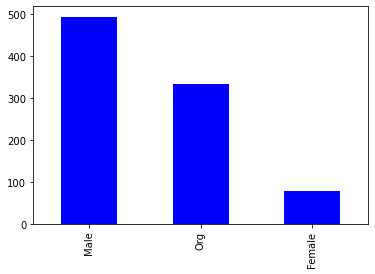

In [9]:
df_copy['Creator Gender'] = df_copy['Creator Gender'].replace(np.nan, 'Org')
df_copy['Creator Gender'] = df_copy['Creator Gender'].replace('Company', 'Org')
df_copy['Creator Gender'].value_counts(dropna = False).plot(kind = 'bar', color = 'blue')

<AxesSubplot:>

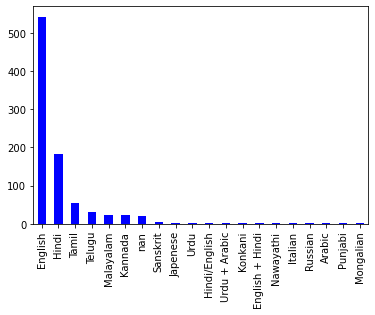

In [10]:
df_copy['Language of the Video'].value_counts(dropna = False).plot(kind = 'bar', color = 'blue')

<AxesSubplot:>

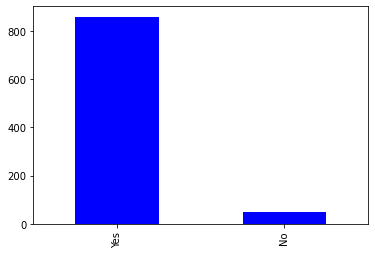

In [11]:
df_copy['Video Description'] = df_copy['Video Description'].replace('NO', 'No')
df_copy['Video Description'].value_counts(dropna = False).plot(kind = 'bar', color = 'blue')

<AxesSubplot:>

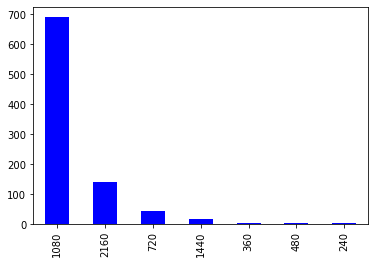

In [12]:
df_copy['Maximum Quality of the Video'].value_counts(dropna = False).plot(kind = 'bar', color = 'blue')

<AxesSubplot:>

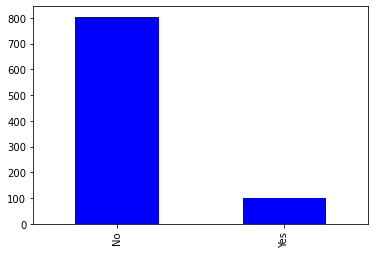

In [13]:
df_copy['Premiered or Not'] = df_copy['Premiered or Not'].replace('yes', 'Yes')
df_copy['Premiered or Not'].value_counts(dropna = False).plot(kind = 'bar', color = 'blue')

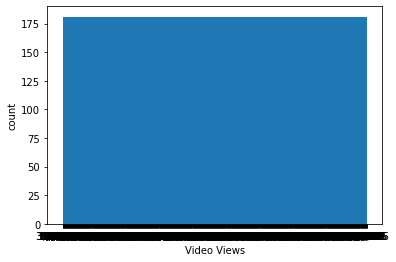

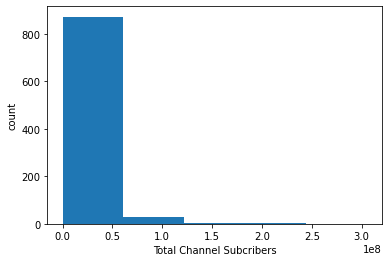

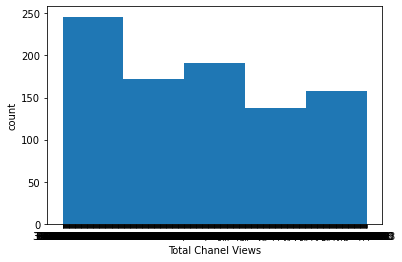

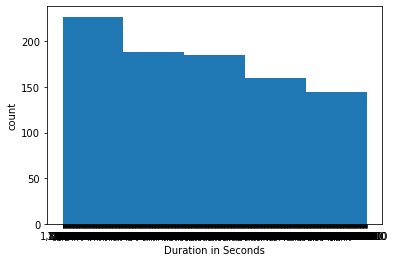

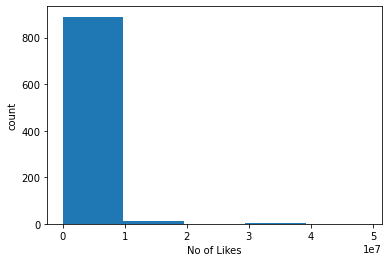

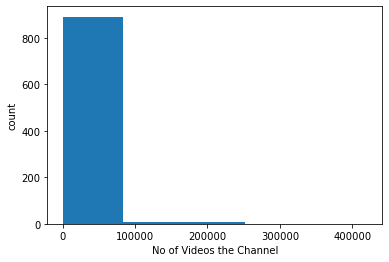

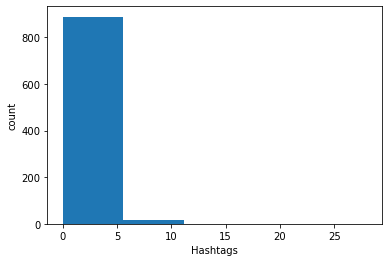

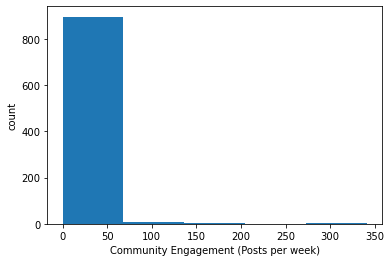

In [14]:
# Histograms for continuous features
for col in continuous_features:
    plt.hist(df[col], bins=5)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

## Handling Missing Values

In [15]:
# Replacing NaN with Orgnization (Org) in Creater Name column
df_copy['Creator Gender'] = df_copy['Creator Gender'].replace(np.nan, 'Org')

In [16]:
# Dropping instances with null values
df_copy = df_copy.dropna(how='any',axis=0)

In [17]:
df_copy.isnull().sum()

Video Views                              0
Creator Gender                           0
Total Channel Subcribers                 0
Total Chanel Views                       0
Duration in Seconds                      0
No of Likes                              0
Language of the Video                    0
Video Description                        0
Hashtags                                 0
Maximum Quality of the Video             0
No of Videos the Channel                 0
Premiered or Not                         0
Community Engagement (Posts per week)    0
dtype: int64

## Handling Outliers

In [18]:
# def clamping_iqr(col):
#     data = df_copy[col]
#     q1 = np.percentile(data,25)
#     q3 = np.percentile(data, 75)
#     iqr = q3 - q1
#     upperLimit = q3 + (1.5*iqr)
#     lowerLimit = q1 - (1.5*iqr)
#     for index, val in enumerate(data):
#         if val > upperLimit:
#             data.loc[index] = upperLimit
#             continue
#         if val < lowerLimit:
#             data.loc[index] = lowerLimit
#             continue
    
# clamping_iqr('Video Views')
# clamping_iqr('Total Chanel Views')
# clamping_iqr('Duration in Seconds')


In [19]:
def clamping_top_5_percent(col):
    data = df_copy[col]
    bound = np.percentile(data, 95)
    for index, val in enumerate(data):
        if val > bound:
            data.loc[index] = bound
            continue
            
clamping_top_5_percent('Total Channel Subcribers')
clamping_top_5_percent('No of Videos the Channel')
clamping_top_5_percent('Hashtags')
clamping_top_5_percent('Community Engagement (Posts per week)')
clamping_top_5_percent('No of Likes')

/Users/sb/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Normalizing Data

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 904
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Video Views                            883 non-null    int64  
 1   Creator Gender                         883 non-null    object 
 2   Total Channel Subcribers               883 non-null    float64
 3   Total Chanel Views                     883 non-null    int64  
 4   Duration in Seconds                    883 non-null    int64  
 5   No of Likes                            883 non-null    Int64  
 6   Language of the Video                  883 non-null    object 
 7   Video Description                      883 non-null    object 
 8   Hashtags                               883 non-null    int64  
 9   Maximum Quality of the Video           883 non-null    int64  
 10  No of Videos the Channel               883 non-null    float64
 11  Premie

In [22]:
continuous_features = ['Video Views', 'Total Channel Subcribers', 'Total Chanel Views', 'Duration in Seconds', 
                      'No of Likes', 'No of Videos the Channel', 'Hashtags', 'Community Engagement (Posts per week)']

categorical_features = ['Creator Gender', 'Language of the Video', 'Video Description',  
                        'Maximum Quality of the Video','Premiered or Not']

In [23]:
data = df_copy.drop(['Creator Gender', 'Language of the Video', 'Video Description', 
                        'Maximum Quality of the Video','Premiered or Not','Duration in Seconds', 'Video Views'], axis='columns')
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

continuous_df = pd.DataFrame(data, columns=['Total Channel Subcribers',
                                        'Total Chanel Views','No of Likes', 'Hashtags',
                                        'No of Videos the Channel','Community Engagement (Posts per week)'])
df_copy = df_copy.reset_index()

df_dropped = df_copy.drop(['Total Channel Subcribers',
                                        'Total Chanel Views','No of Likes', 'Hashtags',
                                        'No of Videos the Channel','Community Engagement (Posts per week)'], axis=1)







In [24]:
df_test = pd.concat([df_dropped, continuous_df], axis=1, ignore_index=True)

continuous_df

,Total Channel Subcribers,Total Chanel Views,No of Likes,Hashtags,No of Videos the Channel,Community Engagement (Posts per week)
0,0.000132,0.000111,1.367347e-04,0.000000,0.001098,0.002933
1,0.003014,0.001923,1.591837e-04,0.035714,0.000595,0.005865
2,0.000001,0.000001,1.751020e-05,0.000000,0.000374,0.000000
3,0.005504,0.007573,3.836735e-06,0.000000,0.033093,0.041056
4,0.039646,0.050337,1.838776e-02,0.000000,0.006836,0.002933
...,...,...,...,...,...,...
878,0.001946,0.001816,4.795918e-06,0.000000,0.011960,0.002933
879,0.001946,0.001816,2.387755e-06,0.071429,0.011960,0.002933
880,0.000077,0.000071,2.040816e-08,0.107143,0.002421,0.002933
881,0.000077,0.000071,2.040816e-08,0.107143,0.002421,0.002933


In [25]:
df_dropped


,index,Video Views,Creator Gender,Duration in Seconds,Language of the Video,Video Description,Maximum Quality of the Video,Premiered or Not
0,0,146059,Male,1841,Kannada,Yes,1080,No
1,1,231969,Male,864,Telugu,Yes,1080,Yes
2,2,878,Female,492,Hindi,Yes,720,No
3,3,9965,Org,66,English,Yes,1080,No
4,4,39780561,Org,460,English,Yes,1080,No
...,...,...,...,...,...,...,...,...
878,900,6892,Org,827,Urdu + Arabic,Yes,1080,No
879,901,16554,Org,404,Nawayathi,Yes,720,No
880,902,32798,Org,384,Nawayathi,Yes,720,No
881,903,1503,Org,279,Urdu,Yes,1080,No


In [26]:
df_copy = pd.concat([df_dropped, continuous_df], axis=1)
df_copy = df_copy.drop(["index"], axis=1)

## Transformations

In [27]:
low = np.percentile(df_copy['Duration in Seconds'],33)
high = np.percentile(df_copy['Duration in Seconds'],66)

print(high, low)
# df_copy['Duration in Seconds'] = df_copy['Duration in Seconds'].astype('str')
data = df_copy['Duration in Seconds']

values = []

for index, val in enumerate(data):
    if val < low:
        values.append('short')
    elif  low <= val <= high :
        values.append('medium')
    else:
        values.append('long')

880.12 445.06


In [28]:
df_copy.insert(5, "Duration", values)


In [29]:
data = df_copy["Maximum Quality of the Video"]

values = []

for index, val in enumerate(data):
    if val == 240 or val == 480 or val == 360:
        values.append("Low")
    elif val == 720 or val == 1080:
        values.append("Medium")
    else:
        values.append("High")
    
df_copy.insert(5, "Video Quality", values)

In [30]:
df_copy = df_copy.drop(["Duration in Seconds", "Maximum Quality of the Video"], axis=1)

## Updated Dataset

In [31]:
df_copy.to_csv('Final_Dataset.csv')